# Name: Vishwas Sunil Kshirsagar

# Task 5: Prediction using Decision Tree Algorithm

### Problem Statement: Create the Decision Tree Classifier and visualize it graphically.

In [31]:
# Importing all the neccessary libraries

import pandas as pd  # to analyze data
import numpy as np  # to perform a wide variety of mathematical operations on arrays
import seaborn as sns # to visualize random distributions.
import matplotlib.pyplot as plt # to perform data visualization and graphical plotting
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load and Read Dataset

In [32]:
# Load and read an inbuild 'iris' dataset

iris = load_iris()
data_f = pd.DataFrame(data = np.c_[iris["data"], iris["target"]],columns = iris.feature_names+["target"])

In [33]:
# print first 5 records

data_f.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [34]:
# print last 5 records

data_f.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [35]:
# let's assign the value for each target  0:setosa, 1:versicolor, 2:virginica

print(np.unique(iris.target))
iris.target_names

[0 1 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
# let's define and return output with the right set

def names(a):
    if(a==0): return "Iris-setosa"
    elif(a==1): return "Iris-Versicolor"
    else: return "Iris-Virginica"
    
data_f["target_name"] = data_f["target"].apply(names)

data_f.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0.0,Iris-setosa
1,4.9,3.0,1.4,0.2,0.0,Iris-setosa
2,4.7,3.2,1.3,0.2,0.0,Iris-setosa
3,4.6,3.1,1.5,0.2,0.0,Iris-setosa
4,5.0,3.6,1.4,0.2,0.0,Iris-setosa


In [37]:
# let's check the nulls if there are any

data_f.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

In [38]:
# print the shape of the dataset

data_f.shape   # 150 rows and 6 columns

(150, 6)

In [39]:
# let's separate independant variables and dependant variable

data = data_f.values

x = data[:,0:4]
y = data[:,4]

In [40]:
y_data = np.array([np.average(x[:,i][y==j]) for i in range(x.shape[1]) for j in (np.unique(y))])
y_data = y_data.reshape(4,3)
y_data = np.swapaxes(y_data, 0,1)

x_axis = np.arange(len(data_f.columns)-2)
width = 0.2

# Visual Represantation

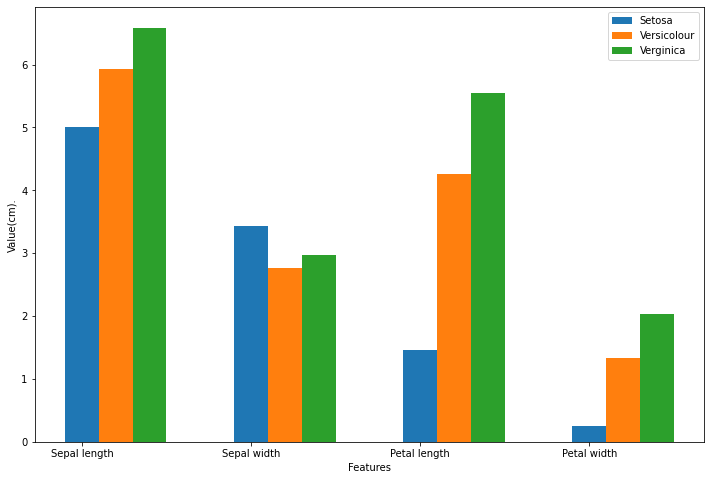

In [41]:
# let's visualize the length and width features

plt.figure(figsize =(12,8))
plt.bar(x_axis, y_data[0], width, label = "Setosa")
plt.bar(x_axis+width, y_data[1], width, label = "Versicolour")
plt.bar(x_axis+width*2, y_data[2], width, label = "Verginica")

plt.xticks(x_axis, ["Sepal length", "Sepal width", "Petal length", "Petal width"])
plt.xlabel("Features")
plt.ylabel("Value(cm).")
plt.legend(bbox_to_anchor=(1,1))

plt.show()

# Train Test Split

In [42]:
# let's split the data into train and test

x = data_f.drop(["target", "target_name"], axis = "columns")
y = data_f["target"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = .2, random_state = 420)

# Decision Tree Classifier Model

In [43]:
model_dt = DecisionTreeClassifier()


# let's fit the model
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
# let's set the prediction model

model_dt.predict(x_test)

array([1., 0., 1., 2., 2., 1., 0., 2., 1., 0., 1., 2., 2., 0., 2., 1., 0.,
       1., 2., 2., 2., 0., 2., 2., 0., 0., 0., 2., 0., 0.])

In [45]:
# let's check the model score

model_dt.score(x_test, y_test)

0.9333333333333333

# Cross Validation Score Function

In [46]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

cv = ShuffleSplit(n_splits=6, test_size = .2)

arr = cross_val_score(DecisionTreeClassifier(), x, y, cv= cv)

print(list(arr))
print("Average Score:", np.mean(arr))

[0.9, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0]
Average Score: 0.9555555555555556


# Dicision Tree Visualization

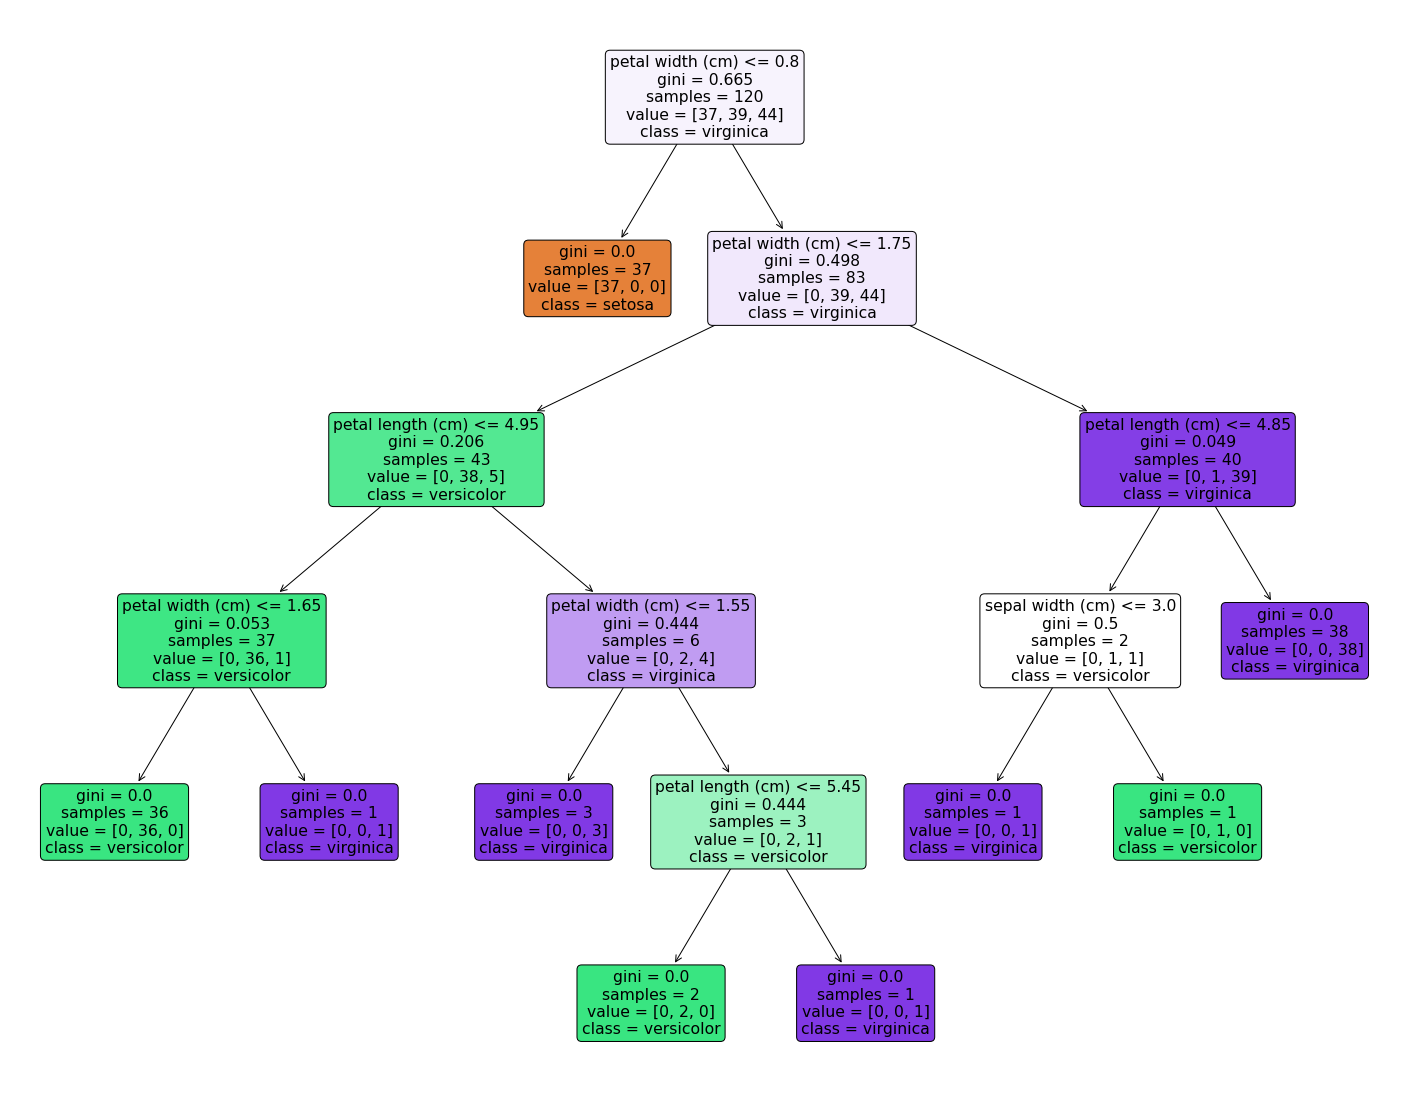

In [30]:
fig = plt.figure(figsize=(25,20))
fig = plot_tree(model_dt, feature_names = iris.feature_names, class_names = iris.target_names,
               rounded = True,
               filled = True)

# Conclusion

### Less the Gini Score better is the model, however the Decision Tree Classifier Graph representation we can interprete that the 'Petal Width' has the more variance than the other variables hence trees getting splitted with Petal Width.